#### Dataset Description
We will be using Beijing Multi-Site Air-Quality Data downloaded from UCI machine learning repository. This data set includes hourly air pollutants data from 12 nationally-controlled air-quality monitoring sites. The air-quality data are from the Beijing Municipal Environmental Monitoring Center. The meteorological data in each air-quality site are matched with the nearest weather station from the China Meteorological Administration. The time period is from March 1st, 2013 to February 28th, 2017. Missing data are denoted as NA.

This dataset comes in 12 .csv files for 12 stations that need to get consolidated into a single dataframe.

Download link: "https://archive.ics.uci.edu/ml/datasets/Beijing+Multi-Site+Air-Quality+Data"

**Attribute Information:**

No: row number  
year: year of data in this row  
month: month of data in this row  
day: day of data in this row  
hour: hour of data in this row  
PM2.5: PM2.5 concentration (ug/m^3)  
PM10: PM10 concentration (ug/m^3)  
SO2: SO2 concentration (ug/m^3)  
NO2: NO2 concentration (ug/m^3)  
CO: CO concentration (ug/m^3)  
O3: O3 concentration (ug/m^3)  
TEMP: temperature (degree Celsius)  
PRES: pressure (hPa)  
DEWP: dew point temperature (degree Celsius)  
RAIN: precipitation (mm)  
wd: wind direction  
WSPM: wind speed (m/s)  
station: name of the air-quality monitoring site  

### Extra information about the data
The 2005 WHO Air quality guidelines offer global guidance on thresholds and limits for key air pollutants that pose health risks. The Guidelines indicate that by reducing particulate matter (PM10) pollution from 70 to 20 micrograms per cubic metre (μg/m), we can cut air pollution-related deaths by around 15%.

The Guidelines apply worldwide and are based on expert evaluation of current scientific evidence for:

- particulate matter (PM)
- ozone (O3)
- nitrogen dioxide (NO2)
- sulfur dioxide (SO2).
Please note that the WHO Air quality guidelines are currently under revision with an expected publication date in 2020.

#### Particulate matter (PM)
PM is a common proxy indicator for air pollution. It affects more people than any other pollutant. The major components of PM are sulfate, nitrates, ammonia, sodium chloride, black carbon, mineral dust and water. It consists of a complex mixture of solid and liquid particles of organic and inorganic substances suspended in the air. While particles  with a diameter of 10 microns or less, (≤ PM10) can penetrate and lodge deep inside the lungs, the even more health-damaging particles are those with a diameter of 2.5 microns or less, (≤ PM2.5). PM2.5  can penetrate the lung barrier and enter the blood system. 
Air quality measurements are typically reported in terms of daily or annual mean concentrations of PM10 particles per cubic meter of air volume (m3). Routine air quality measurements typically describe such PM concentrations in terms of micrograms per cubic meter (μg/m3). 

#### WHO Air quality guideline values

**Fine particulate matter (PM2.5)**
- 10 μg/m3 annual mean
- 25 μg/m3 24-hour mean

**Coarse particulate matter (PM10)**
- 20 μg/m3 annual mean
- 50 μg/m3 24-hour mean

**Ozone (O3)**
- 100 μg/m3 8-hour mean

**Nitrogen dioxide (NO2)**
- 40 μg/m3 annual mean
- 200 μg/m3 1-hour mean

**Sulfur dioxide (SO2)**
- 20 μg/m3 24-hour mean
- 500 μg/m3 10-minute mean

Source: https://www.who.int/news-room/fact-sheets/detail/ambient-(outdoor)-air-quality-and-health

### My Comments on the data
Something that I think this data is missing is information on how the pollution data for each pollutant has been aggregated. For instance, is the data for NO2 on a specific date, 1-hour mean?

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# returns a list of file names with the matching name pattern
files = glob.glob(r'D:\Online_course\Datasets\UCI_Beijing Multi-Site Air-Quality Data\PRSA_Data*.csv') 
files

['D:\\Online_course\\Datasets\\UCI_Beijing Multi-Site Air-Quality Data\\PRSA_Data_Aotizhongxin_20130301-20170228.csv',
 'D:\\Online_course\\Datasets\\UCI_Beijing Multi-Site Air-Quality Data\\PRSA_Data_Changping_20130301-20170228.csv',
 'D:\\Online_course\\Datasets\\UCI_Beijing Multi-Site Air-Quality Data\\PRSA_Data_Dingling_20130301-20170228.csv',
 'D:\\Online_course\\Datasets\\UCI_Beijing Multi-Site Air-Quality Data\\PRSA_Data_Dongsi_20130301-20170228.csv',
 'D:\\Online_course\\Datasets\\UCI_Beijing Multi-Site Air-Quality Data\\PRSA_Data_Guanyuan_20130301-20170228.csv',
 'D:\\Online_course\\Datasets\\UCI_Beijing Multi-Site Air-Quality Data\\PRSA_Data_Gucheng_20130301-20170228.csv',
 'D:\\Online_course\\Datasets\\UCI_Beijing Multi-Site Air-Quality Data\\PRSA_Data_Huairou_20130301-20170228.csv',
 'D:\\Online_course\\Datasets\\UCI_Beijing Multi-Site Air-Quality Data\\PRSA_Data_Nongzhanguan_20130301-20170228.csv',
 'D:\\Online_course\\Datasets\\UCI_Beijing Multi-Site Air-Quality Data\\PRS

In [3]:
air_quality = pd.DataFrame()

for file in files:
    df = pd.read_csv(file)
    print(f" Uploading {df.shape[0]} rows of {file.split('PRSA_Data_')[1].split('_20130301-20170228.csv')[0]} station ...")
    air_quality = pd.concat([air_quality,df],ignore_index= True) # append() doesn't happen in-place, meaning the output has to be stored. 
    # in this case if I don't assign pd.concat([air_quality,df]) to  air_quality, the code doesn't return anything

# move the categorical features to the end for easier slicing    
new_cols = ['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM','wd', 'station']
air_quality = air_quality[new_cols]
display(air_quality)
    

 Uploading 35064 rows of Aotizhongxin station ...
 Uploading 35064 rows of Changping station ...
 Uploading 35064 rows of Dingling station ...
 Uploading 35064 rows of Dongsi station ...
 Uploading 35064 rows of Guanyuan station ...
 Uploading 35064 rows of Gucheng station ...
 Uploading 35064 rows of Huairou station ...
 Uploading 35064 rows of Nongzhanguan station ...
 Uploading 35064 rows of Shunyi station ...
 Uploading 35064 rows of Tiantan station ...
 Uploading 35064 rows of Wanliu station ...
 Uploading 35064 rows of Wanshouxigong station ...


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,wd,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,4.4,NNW,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,4.7,N,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,5.6,NNW,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,3.1,NW,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,2.0,N,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420763,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,2.4,NW,Wanshouxigong
420764,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,0.9,WNW,Wanshouxigong
420765,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,1.1,NW,Wanshouxigong
420766,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,1.2,NNW,Wanshouxigong


In [4]:
# Stratified train_test_split based on the "station" feature
# Making sure we have the same number of data points per station to be representative of the data
from sklearn.model_selection import StratifiedShuffleSplit
split_strat = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for temp_train_index, test_index in split_strat.split(air_quality, air_quality["station"]):
    temp_strat_train_set = air_quality.iloc[temp_train_index]
    strat_test_set = air_quality.iloc[test_index]

# Splitting the training set into a new training set and a validiation set 
for train_index, val_index in split_strat.split(temp_strat_train_set, temp_strat_train_set["station"]):
    strat_train_set = temp_strat_train_set.iloc[train_index]
    strat_val_set = temp_strat_train_set.iloc[val_index]
    
print(" Training set size:", strat_train_set.shape,"\n","Validation set size:", strat_val_set.shape,\
      "\n","Test set size:", strat_test_set.shape)


 Training set size: (269291, 18) 
 Validation set size: (67323, 18) 
 Test set size: (84154, 18)


In [5]:
# Check the number of samples in each set for each station  
for loc in strat_train_set["station"].unique():
    print(f"{loc} station data points:\
          Training set: {strat_train_set[strat_train_set['station'] == str(loc)].shape[0]},\
          Test set: {strat_test_set[strat_test_set['station'] == str(loc)].shape[0]},\
          ,Validation set: {strat_val_set[strat_val_set['station'] == str(loc)].shape[0]}")


Tiantan station data points:          Training set: 22441,          Test set: 7012,          ,Validation set: 5611
Dongsi station data points:          Training set: 22441,          Test set: 7013,          ,Validation set: 5610
Changping station data points:          Training set: 22441,          Test set: 7013,          ,Validation set: 5610
Dingling station data points:          Training set: 22441,          Test set: 7013,          ,Validation set: 5610
Gucheng station data points:          Training set: 22441,          Test set: 7013,          ,Validation set: 5610
Shunyi station data points:          Training set: 22441,          Test set: 7013,          ,Validation set: 5610
Aotizhongxin station data points:          Training set: 22441,          Test set: 7013,          ,Validation set: 5610
Guanyuan station data points:          Training set: 22441,          Test set: 7013,          ,Validation set: 5610
Huairou station data points:          Training set: 22440,          Test 

In [6]:
# Convert all NAs to numpy NaN for simplicity
strat_train_set.fillna(np.nan)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,wd,station
333098,17523,2015,3,1,2,29.0,114.0,4.0,15.0,300.0,43.0,-2.6,1020.4,-8.3,0.0,1.0,WNW,Tiantan
126202,21011,2015,7,24,10,98.0,115.0,2.0,60.0,1300.0,46.0,25.9,998.5,22.0,0.0,0.9,ENE,Dongsi
318092,2517,2013,6,13,20,106.0,175.0,18.0,37.0,900.0,159.0,26.9,1003.7,14.0,0.0,1.2,S,Tiantan
346516,30941,2016,9,10,4,15.0,34.0,2.0,50.0,400.0,3.0,20.2,1005.6,12.7,0.0,1.6,NE,Tiantan
331336,15761,2014,12,17,16,68.0,98.0,27.0,64.0,1200.0,33.0,4.0,1023.0,-16.4,0.0,1.5,S,Tiantan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244167,33784,2017,1,6,15,186.0,201.0,21.0,75.0,3100.0,47.0,4.1,1015.6,-4.9,0.0,1.7,SE,Huairou
288763,8252,2014,2,7,19,106.0,77.0,18.0,38.0,1200.0,37.0,-3.3,1021.3,-5.5,0.0,2.0,ESE,Shunyi
374556,23917,2015,11,22,12,41.0,41.0,6.0,33.0,700.0,22.0,-1.4,1030.6,-3.4,0.5,0.5,SSE,Wanliu
173792,33537,2016,12,27,8,27.0,43.0,11.0,61.0,1000.0,4.0,-3.8,1032.5,-16.1,0.0,1.1,NE,Guanyuan


In [7]:
# Sanity check of NaN conversion
air_quality.query('PRES == "nan"')

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,wd,station
16748,16749,2015,1,27,20,26.0,42.0,12.0,78.0,1300.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,Aotizhongxin
17263,17264,2015,2,18,7,13.0,14.0,12.0,22.0,600.0,60.0,NaN,NaN,NaN,NaN,NaN,NaN,Aotizhongxin
31047,31048,2016,9,14,15,75.0,75.0,4.0,20.0,700.0,209.0,NaN,NaN,NaN,NaN,3.1,SW,Aotizhongxin
31315,31316,2016,9,25,19,168.0,168.0,2.0,77.0,1500.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,Aotizhongxin
31316,31317,2016,9,25,20,182.0,182.0,2.0,82.0,1600.0,46.0,NaN,NaN,NaN,NaN,NaN,NaN,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419791,34088,2017,1,19,7,114.0,143.0,32.0,83.0,2800.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Wanshouxigong
419792,34089,2017,1,19,8,106.0,120.0,27.0,80.0,2400.0,42.0,NaN,NaN,NaN,NaN,1.1,NW,Wanshouxigong
419989,34286,2017,1,27,13,46.0,68.0,11.0,13.0,700.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN,Wanshouxigong
419990,34287,2017,1,27,14,38.0,82.0,10.0,11.0,600.0,73.0,NaN,NaN,NaN,NaN,NaN,NaN,Wanshouxigong


### Things that we can do with this dataset
1) EDA
   - Find if there is a linear correlation between its variables ( polution can be our explanatory variable while time of the day, months, seasons, temp, Pressure

2-1) Create a data cleaning, imputing and transforming pipeline

2-2) Fit a Multi-Output Linear Regression model (more than one target variables)

3) Regularize the model using Ridge, LASSO and Elastic Net, save each model

4-1) Fit a non-parametric model to the data and compare it to the linear model ( Random forest, GBRT, XGboost, SVM) 

4-2) Hyperparameter tuning on the shortlisted models, save the parameters and predictions 

5) Fit a calassification model to the data to guess which station the data is from

6) Remove the station and run a clustering algorithm to see if we can cluster based on the location

7) Conduct a time series analysis

8) Sample the data and perform ML and compare with the result of ML on the whole dataset

### Exploratory Data Analysis

###### A) Check Linear correlation between variables

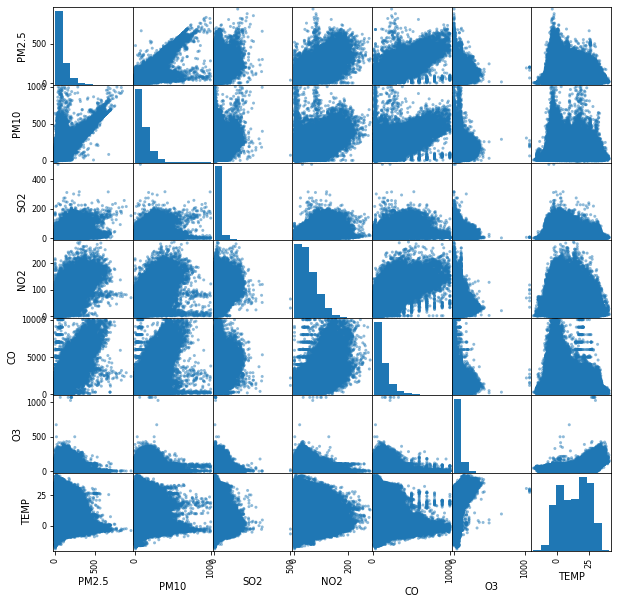

In [8]:
from pandas.plotting import scatter_matrix
scatter_matrix(strat_train_set.iloc[:,[5,6,7,8,9,10,11]],figsize = (10,10));

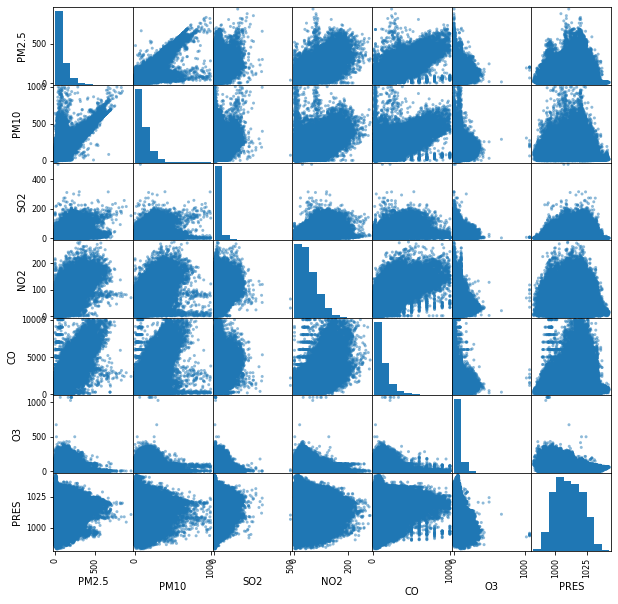

In [9]:
scatter_matrix(strat_train_set.iloc[:,[5,6,7,8,9,10,12]],figsize = (10,10));

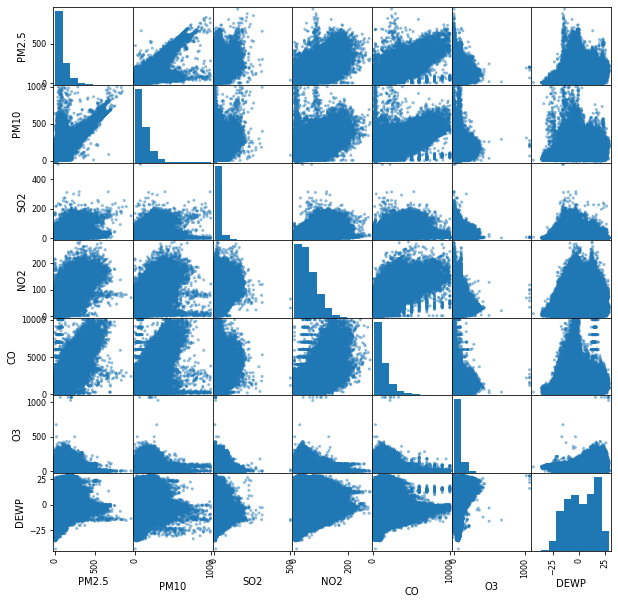

In [10]:
scatter_matrix(strat_train_set.iloc[:,[5,6,7,8,9,10,13]],figsize = (10,10));

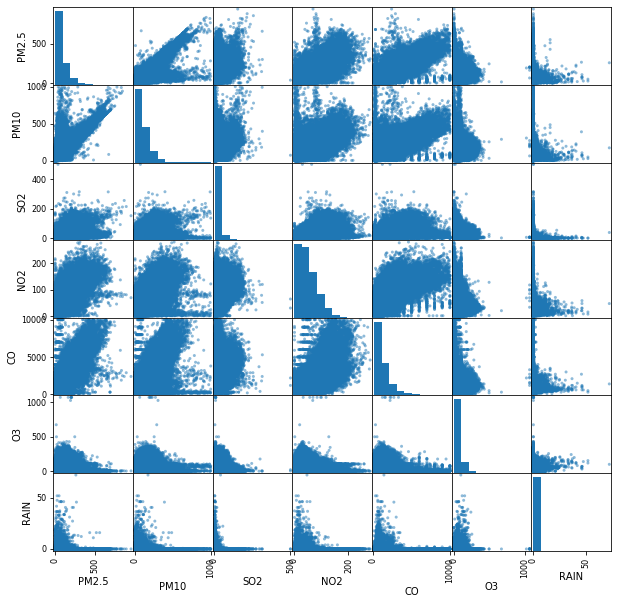

In [11]:
scatter_matrix(strat_train_set.iloc[:,[5,6,7,8,9,10,14]],figsize = (10,10));

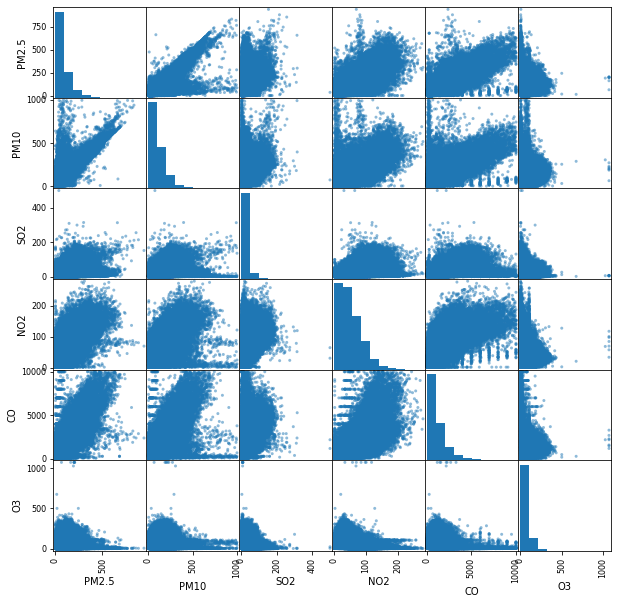

In [12]:
scatter_matrix(strat_train_set.iloc[:,[5,6,7,8,9,10,16]],figsize = (10,10));

#### B) Checking the summary stats and missing data

In [13]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269291 entries, 333098 to 135792
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       269291 non-null  int64  
 1   year     269291 non-null  int64  
 2   month    269291 non-null  int64  
 3   day      269291 non-null  int64  
 4   hour     269291 non-null  int64  
 5   PM2.5    263777 non-null  float64
 6   PM10     265228 non-null  float64
 7   SO2      263505 non-null  float64
 8   NO2      261629 non-null  float64
 9   CO       256060 non-null  float64
 10  O3       260821 non-null  float64
 11  TEMP     269030 non-null  float64
 12  PRES     269035 non-null  float64
 13  DEWP     269026 non-null  float64
 14  RAIN     269038 non-null  float64
 15  WSPM     269084 non-null  float64
 16  wd       268129 non-null  object 
 17  station  269291 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 39.0+ MB


In [14]:
strat_train_set.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,269291.000000,269291.000000,269291.00000,269291.000000,269291.000000,263777.000000,265228.000000,263505.000000,261629.000000,256060.000000,260821.000000,269030.000000,269035.000000,269026.000000,269038.000000,269084.000000
mean,17518.402754,2014.660995,6.52213,15.739327,11.492909,79.702366,104.507225,15.837214,50.597028,1232.061642,57.417943,13.548776,1010.730945,2.509502,0.063785,1.729468
std,10119.930339,1.176933,3.44629,8.800927,6.922365,80.611241,91.562600,21.614431,35.057017,1160.484895,56.621395,11.444094,10.477756,13.796476,0.820187,1.248210
min,1.000000,2013.000000,1.00000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-18.900000,982.700000,-43.400000,0.000000,0.000000
25%,8764.000000,2014.000000,4.00000,8.000000,5.000000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.200000,-8.900000,0.000000,0.900000
50%,17498.000000,2015.000000,7.00000,16.000000,11.000000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,26290.000000,2016.000000,10.00000,23.000000,18.000000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,35064.000000,2017.000000,12.00000,31.000000,23.000000,941.000000,999.000000,500.000000,280.000000,10000.000000,1071.000000,41.400000,1042.800000,29.100000,72.500000,13.200000


In [15]:
def NA_checker(df):
    """ # a simple function to check the number of  missing values in all columns of a dataframe """

    for i,col in enumerate(df.columns):
        print(f" Number of missing values in column {i},['{col}']: {df.shape[0] - df[col].count()}")

In [16]:
NA_checker(strat_train_set)

 Number of missing values in column 0,['No']: 0
 Number of missing values in column 1,['year']: 0
 Number of missing values in column 2,['month']: 0
 Number of missing values in column 3,['day']: 0
 Number of missing values in column 4,['hour']: 0
 Number of missing values in column 5,['PM2.5']: 5514
 Number of missing values in column 6,['PM10']: 4063
 Number of missing values in column 7,['SO2']: 5786
 Number of missing values in column 8,['NO2']: 7662
 Number of missing values in column 9,['CO']: 13231
 Number of missing values in column 10,['O3']: 8470
 Number of missing values in column 11,['TEMP']: 261
 Number of missing values in column 12,['PRES']: 256
 Number of missing values in column 13,['DEWP']: 265
 Number of missing values in column 14,['RAIN']: 253
 Number of missing values in column 15,['WSPM']: 207
 Number of missing values in column 16,['wd']: 1162
 Number of missing values in column 17,['station']: 0


In [17]:
# check how many levels wind direction categorical variable has
print(strat_train_set["wd"].unique() , len(strat_train_set["wd"].unique()))
print(strat_train_set["station"].unique() , len(strat_train_set["station"].unique()))

['WNW' 'ENE' 'S' 'NE' 'ESE' 'NNW' 'SE' 'W' 'E' 'SW' 'NNE' 'SSW' 'SSE'
 'WSW' 'N' 'NW' nan] 17
['Tiantan' 'Dongsi' 'Changping' 'Dingling' 'Gucheng' 'Shunyi'
 'Aotizhongxin' 'Guanyuan' 'Huairou' 'Wanshouxigong' 'Nongzhanguan'
 'Wanliu'] 12


### Data Preparation 

In [18]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline

In [19]:
"""
it simply transforms the data by selecting the desired attributes (numerical or categorical), dropping the rest, and con‐
verting the resulting DataFrame to a NumPy array. There is nothing in Scikit-Learn to handle Pandas DataFrames,20 
so we need to write a simple custom transformer for this task
Reference: Hands-On Machine Learning with Scikit-Learn and TensorFlow by Aurélien Géron, 1st edition, page 67
"""

from sklearn.base import BaseEstimator, TransformerMixin
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [20]:
# As OneHotEncoding returns a numpy array with no column names, it is difficult to guess what is what.
# So, adding column names to the final output would be helpful
# Here is two functions to do this for us

def list_flattener(lst):
    """ This functions takes a nested list and returns a flattened list"""
    flat_list =[]
    for item in lst:
        if type(item) == list:
            for subitem in item:
                flat_list.append(subitem)
        else:
            flat_list.append(item)
    
    return flat_list

def OHE_labeler(df,cat_col_idx):
    """ This function gets the dataframe and the categorical columns indices (could be unsorted), creates column names 
    for all the levels using the original column name + seuqential numbering and then returns the final column names 
    to be used for One Hot Encoded dataframe 
    """
    cat_levels = 0
    new_col_names = list(df.columns)

    for idx in np.sort(cat_col_idx):
        cat_levels = len(df.iloc[:,idx].unique()) - sum(pd.isnull(df.iloc[:,idx].unique()))  # excludes NaN
        cat_col_names = [df.columns[idx]+ str(i) for i in range(cat_levels)] # Create sequential categorical column names
        new_col_names.remove(df.columns[idx]) # remove the original categorical columns from the column list
        new_col_names.insert(idx,cat_col_names) # insert the new sequential cat column names in the right position
    return list_flattener(new_col_names) # return the flattened list of col names    
    

In [21]:
# Separate numerical and categorical attributes
cat_cols = ["wd","station"]  
num_cols = strat_train_set.columns[5:-2]

In [22]:
# Create a pipeline to transform the categorical attributes

cat_pipeline = Pipeline ([("DF selector",DataFrameSelector(cat_cols)), 
                          ("imputer", SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
                          ("OneHotEncoder", OneHotEncoder()),
                         ])

# Create a pipeline to transform the numerical attributes

num_pipeline = Pipeline ([("DF selector",DataFrameSelector(num_cols)),  
                          ("imputer", SimpleImputer(missing_values=np.nan, strategy='median')),
                         ])

# Merge two pipelines into a single pipeline

full_pipeline = FeatureUnion(transformer_list=[("num_pipeline", num_pipeline),
                                               ("cat_pipeline", cat_pipeline),
                                              ])


In [23]:
%%time
# Apply the pipeline to the training data
strat_train_set_xform = full_pipeline.fit_transform(strat_train_set).toarray()
print(strat_train_set_xform.shape)
strat_train_set_xform

(269291, 39)
Wall time: 2min 2s


array([[ 29., 114.,   4., ...,   1.,   0.,   0.],
       [ 98., 115.,   2., ...,   0.,   0.,   0.],
       [106., 175.,  18., ...,   1.,   0.,   0.],
       ...,
       [ 41.,  41.,   6., ...,   0.,   1.,   0.],
       [ 27.,  43.,  11., ...,   0.,   0.,   0.],
       [ 28.,  61.,   2., ...,   0.,   0.,   0.]])

In [24]:
# Convert the resulted array to a dataframe with column names for better clarity
final_column_names = OHE_labeler(air_quality.iloc[:,5:],[11,12])
strat_train_set_xform_df = pd.DataFrame(strat_train_set_xform, columns = final_column_names)
strat_train_set_xform_df

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,...,station2,station3,station4,station5,station6,station7,station8,station9,station10,station11
0,29.0,114.0,4.0,15.0,300.0,43.0,-2.6,1020.4,-8.3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,98.0,115.0,2.0,60.0,1300.0,46.0,25.9,998.5,22.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,106.0,175.0,18.0,37.0,900.0,159.0,26.9,1003.7,14.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,15.0,34.0,2.0,50.0,400.0,3.0,20.2,1005.6,12.7,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,68.0,98.0,27.0,64.0,1200.0,33.0,4.0,1023.0,-16.4,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269286,186.0,201.0,21.0,75.0,3100.0,47.0,4.1,1015.6,-4.9,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
269287,106.0,77.0,18.0,38.0,1200.0,37.0,-3.3,1021.3,-5.5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
269288,41.0,41.0,6.0,33.0,700.0,22.0,-1.4,1030.6,-3.4,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
269289,27.0,43.0,11.0,61.0,1000.0,4.0,-3.8,1032.5,-16.1,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
#check for missing values after imputation
NA_checker(strat_train_set_xform_df)

 Number of missing values in column 0,['PM2.5']: 0
 Number of missing values in column 1,['PM10']: 0
 Number of missing values in column 2,['SO2']: 0
 Number of missing values in column 3,['NO2']: 0
 Number of missing values in column 4,['CO']: 0
 Number of missing values in column 5,['O3']: 0
 Number of missing values in column 6,['TEMP']: 0
 Number of missing values in column 7,['PRES']: 0
 Number of missing values in column 8,['DEWP']: 0
 Number of missing values in column 9,['RAIN']: 0
 Number of missing values in column 10,['WSPM']: 0
 Number of missing values in column 11,['wd0']: 0
 Number of missing values in column 12,['wd1']: 0
 Number of missing values in column 13,['wd2']: 0
 Number of missing values in column 14,['wd3']: 0
 Number of missing values in column 15,['wd4']: 0
 Number of missing values in column 16,['wd5']: 0
 Number of missing values in column 17,['wd6']: 0
 Number of missing values in column 18,['wd7']: 0
 Number of missing values in column 19,['wd8']: 0
 Num

In [26]:
%%time
# Apply the pipeline to the validation data
strat_val_set_xform = full_pipeline.fit_transform(strat_val_set).toarray()
print(strat_val_set_xform.shape)
strat_val_set_xform

(67323, 39)
Wall time: 1.14 s


array([[131., 216.,  27., ...,   0.,   0.,   1.],
       [ 77.,  86.,   2., ...,   0.,   0.,   0.],
       [120., 120.,  11., ...,   0.,   0.,   0.],
       ...,
       [ 67., 200.,  17., ...,   0.,   0.,   1.],
       [ 89., 155.,  33., ...,   0.,   0.,   0.],
       [ 35.,  86.,   4., ...,   0.,   0.,   1.]])

In [27]:
%%time
# Apply the pipeline to the test data
strat_test_set_xform = full_pipeline.fit_transform(strat_test_set).toarray()
print(strat_test_set_xform.shape)
strat_test_set_xform

(84154, 39)
Wall time: 1.72 s


array([[ 28.,  62.,  18., ...,   0.,   0.,   0.],
       [ 87., 147.,  23., ...,   0.,   1.,   0.],
       [132., 132.,   6., ...,   1.,   0.,   0.],
       ...,
       [ 30.,  30.,   2., ...,   0.,   0.,   0.],
       [112., 112.,  15., ...,   0.,   0.,   0.],
       [ 21., 113.,   2., ...,   0.,   0.,   0.]])

### Multi-Output regression models

Some regression machine learning algorithms support multiple outputs directly.

This includes most of the popular machine learning algorithms implemented in the scikit-learn library, such as:

- LinearRegression (and related)

- KNeighborsRegressor

- DecisionTreeRegressor

- RandomForestRegressor (and related)


Sklearn has also a MultiOutputRegressor class which is a simple strategy for extending regressors that do not natively support multi-target regression. This strategy consists of fitting one regressor per target. 
https://scikit-learn.org/stable/modules/generated/sklearn.multioutput.MultiOutputRegressor.html


### Multi-output Linear Regression model with different type of regularization

The problem is that we want to know how parameters such as temperature, wind speed, rain etc would affect the pollutants (6 pollutants listed in this data set). So, our label consists of 6 variables that need to be predicted. That's why this is a multi-output model.


In [28]:
# Separate labels from the predictors in the training set
y_tr = strat_train_set_xform[:,0:6]
X_tr = strat_train_set_xform[:,6:]
print(X_tr.shape, y_tr.shape)

(269291, 33) (269291, 6)


In [29]:
# Separate labels from the predictors in the validation set
y_val = strat_val_set_xform[:,0:6]
X_val = strat_val_set_xform[:,6:]
print(X_val.shape, y_val.shape)

(67323, 33) (67323, 6)


In [30]:
# Separate labels from the predictors in the test set
y_te = strat_test_set_xform[:,0:6]
X_te = strat_test_set_xform[:,6:]
print(X_te.shape, y_te.shape)

(84154, 33) (84154, 6)


In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [32]:
linear_model = LinearRegression()
linear_model.fit(X_tr,y_tr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
y_val_pred = linear_model.predict(X_val)
RMSE_val = np.sqrt(mean_squared_error(y_val,y_val_pred))
RMSE_val

394.79221785610434

In [34]:
def feat_weights(model,target_name,feat_name):
    """ This is a function to show the descendingly sorted feature weights along with the feature name and 
    the corresponding target variable for Linear models with the .coeff_ method """
    feat_weight = []
    for target_name,weights in zip(target_name,model.coef_):
        sorted_weights = sorted(list(zip(feat_name,weights))\
           ,key=lambda x: x[1], reverse=True) # sort the weights in descending order

        for  feat_name,coeff in sorted_weights:
            feat_weight.append([target_name,feat_name,coeff])
    return feat_weight        

### Now let's have a look at the feature weights

In [35]:
feat_weights(linear_model,strat_train_set_xform_df.columns[:6],strat_train_set_xform_df.columns[6:])

[['PM2.5', 'wd10', 242560439389.4957],
 ['PM2.5', 'wd8', 242560439385.91696],
 ['PM2.5', 'wd9', 242560439384.39114],
 ['PM2.5', 'wd11', 242560439383.51404],
 ['PM2.5', 'wd2', 242560439383.22818],
 ['PM2.5', 'wd0', 242560439377.2779],
 ['PM2.5', 'wd12', 242560439376.58664],
 ['PM2.5', 'wd1', 242560439370.38205],
 ['PM2.5', 'wd15', 242560439368.0944],
 ['PM2.5', 'wd4', 242560439360.98267],
 ['PM2.5', 'wd13', 242560439358.24075],
 ['PM2.5', 'wd14', 242560439353.91922],
 ['PM2.5', 'wd5', 242560439351.10632],
 ['PM2.5', 'wd3', 242560439351.01733],
 ['PM2.5', 'wd7', 242560439347.1691],
 ['PM2.5', 'wd6', 242560439347.12204],
 ['PM2.5', 'DEWP', 3.3071615885334458],
 ['PM2.5', 'PRES', -1.396402094796651],
 ['PM2.5', 'WSPM', -2.584757870894459],
 ['PM2.5', 'RAIN', -4.291754189761058],
 ['PM2.5', 'TEMP', -5.512120714818203],
 ['PM2.5', 'station3', -175078329674.78088],
 ['PM2.5', 'station7', -175078329676.0679],
 ['PM2.5', 'station11', -175078329677.18582],
 ['PM2.5', 'station9', -175078329678.63

We can see that the weights are too big which means that regularization could help limit the weights

##### Save the linear model using " joblib " library

In [36]:
import joblib
joblib.dump(linear_model,"linear_model.pkl")

## joblib.load("linear_model.pkl") will load the model

['linear_model.pkl']

Let's set "normalize = True" in the Linear Regression instantiation and repeat the same steps

In [37]:
linear_model_norm = LinearRegression(normalize= True)
linear_model_norm.fit(X_tr,y_tr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [38]:
y_val_pred_norm = linear_model.predict(X_val)
RMSE_val_norm = np.sqrt(mean_squared_error(y_val,y_val_pred_norm))
RMSE_val_norm

394.79221785610434

**Comparison**  
The above comparison showed that normalization of the X doesn't change the Linear Regression error.

In [39]:
## Calculating the RMSE of the test set
y_te_pred = linear_model.predict(X_te)
RMSE_te = np.sqrt(mean_squared_error(y_te,y_te_pred))
RMSE_te

396.7523183253452

##### Now let's try regularizing the model

In [40]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt


#### Ridge Regression

In [41]:
ridge_reg = Ridge(alpha = 1.0,max_iter= 10000 ,random_state=835)
ridge_reg.fit(X_tr,y_tr)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=False, random_state=835, solver='auto', tol=0.001)

In [42]:
y_val_pred_ridge = ridge_reg.predict(X_val)
RMSE_val_ridge = np.sqrt(mean_squared_error(y_val,y_val_pred_ridge))
RMSE_val_ridge

394.79226083685256

Seems that Ridge Regression is a multi-output algorithm but if it wasn't the following method could be used to make it compatible

In [43]:
clf = MultiOutputRegressor(Ridge()).fit(X_tr,y_tr)

In [44]:
RMSE_val_ridge_MO = np.sqrt(mean_squared_error(y_val,clf.predict(X_val)))
RMSE_val_ridge_MO

394.7922608368528

#### Ridge Regression Hyperparameter Tuning
Now let's see if performing hyperparameters tuning on "alpha" and "max_iter" can improve the error

In [45]:
param_grid = {'alpha': [1.8,2,3,5,10], 'max_iter': [500,1000, 5000]}
grid_search = GridSearchCV(ridge_reg, param_grid, cv=5,scoring='neg_mean_squared_error')
grid_search.fit(X_val, y_val)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=10000, normalize=False, random_state=835,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1.8, 2, 3, 5, 10],
                         'max_iter': [500, 1000, 5000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [46]:
# check the best parameters
grid_search.best_params_

{'alpha': 10, 'max_iter': 500}

In [47]:
# Check CV results
grid_search.cv_results_

{'mean_fit_time': array([0.04123931, 0.03729901, 0.03855867, 0.03988714, 0.0379766 ,
        0.04069085, 0.03889642, 0.04049201, 0.03749943, 0.03987484,
        0.03675742, 0.04154639, 0.04316783, 0.03998308, 0.03871913]),
 'std_fit_time': array([0.00303722, 0.0018649 , 0.00320546, 0.00426669, 0.0035494 ,
        0.00347803, 0.00166915, 0.00421205, 0.00365619, 0.00421209,
        0.00135376, 0.00283362, 0.00122924, 0.00362363, 0.00341023]),
 'mean_score_time': array([0.00284028, 0.0024466 , 0.00239668, 0.0022006 , 0.00259342,
        0.00220542, 0.00199499, 0.00259395, 0.00240006, 0.00259271,
        0.0021944 , 0.00241084, 0.00259347, 0.00263529, 0.00263796]),
 'std_score_time': array([7.62995658e-04, 5.40074960e-04, 4.97296364e-04, 4.10795392e-04,
        4.88149487e-04, 4.06968919e-04, 6.14361702e-07, 4.88481290e-04,
        4.95111174e-04, 4.87760540e-04, 7.46289517e-04, 4.75703045e-04,
        4.87702565e-04, 5.29062794e-04, 4.91646087e-04]),
 'param_alpha': masked_array(data=[1.8

In [48]:
# only print the average RMSE and the associated parameters
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

394.8559939541024 {'alpha': 1.8, 'max_iter': 500}
394.8559939541024 {'alpha': 1.8, 'max_iter': 1000}
394.8559939541024 {'alpha': 1.8, 'max_iter': 5000}
394.85598570829893 {'alpha': 2, 'max_iter': 500}
394.85598570829893 {'alpha': 2, 'max_iter': 1000}
394.85598570829893 {'alpha': 2, 'max_iter': 5000}
394.8559455645565 {'alpha': 3, 'max_iter': 500}
394.8559455645565 {'alpha': 3, 'max_iter': 1000}
394.8559455645565 {'alpha': 3, 'max_iter': 5000}
394.8558706925085 {'alpha': 5, 'max_iter': 500}
394.8558706925085 {'alpha': 5, 'max_iter': 1000}
394.8558706925085 {'alpha': 5, 'max_iter': 5000}
394.8557149435339 {'alpha': 10, 'max_iter': 500}
394.8557149435339 {'alpha': 10, 'max_iter': 1000}
394.8557149435339 {'alpha': 10, 'max_iter': 5000}


Best Alpha : 0.01, Best RMSE : 394.7922357344979


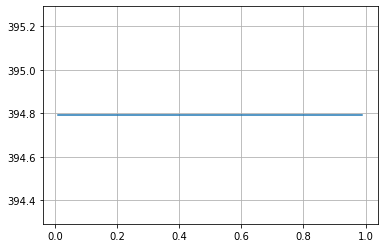

In [49]:
# Cross validation on the value of "alpha" with a given max_iter
RMSE = []
ALPHA = []
for alp in np.arange(0.01,1,.01):
    model = Ridge(alpha = alp, max_iter= 500,random_state=835)
    model.fit(X_tr,y_tr)
    RMSE.append(np.sqrt(mean_squared_error(y_val,model.predict(X_val))))
    ALPHA.append(alp)
Best_Alpha_R = ALPHA[np.argmin(RMSE)]
Best_RMSE_R = np.min(RMSE)
print(f"Best Alpha : {Best_Alpha_R}, Best RMSE : {Best_RMSE_R}")
plt.plot(ALPHA,RMSE);
plt.grid(True)
plt.ylim(bottom = np.min(RMSE)-0.5);
plt.ylim(top = np.max(RMSE)+0.5);


##### Saving the Ridge model with the best parameters

In [50]:
ridge_reg_best = Ridge(alpha = Best_Alpha_R,max_iter= 500,random_state=835)
ridge_reg_best.fit(X_tr,y_tr)

joblib.dump(ridge_reg_best,"ridge_reg_best.pkl")

## joblib.load("ridge_reg_best.pkl") will load the model

['ridge_reg_best.pkl']

**Conclusion:** As we can see even the GridSearch could not improve the RMSE.

### Now let's have a look at the feature weights

In [51]:
feat_weights(ridge_reg_best,strat_train_set_xform_df.columns[:6],strat_train_set_xform_df.columns[6:])

[['PM2.5', 'wd10', 21.46794307434571],
 ['PM2.5', 'wd8', 17.889458277516997],
 ['PM2.5', 'wd9', 16.363125124848555],
 ['PM2.5', 'wd11', 15.486183881515391],
 ['PM2.5', 'wd2', 15.200303210324323],
 ['PM2.5', 'wd0', 9.249993188911354],
 ['PM2.5', 'wd12', 8.55875424139679],
 ['PM2.5', 'station3', 8.056810429918501],
 ['PM2.5', 'station7', 6.769932109087743],
 ['PM2.5', 'station11', 5.6520589425435634],
 ['PM2.5', 'station9', 4.202244340072645],
 ['PM2.5', 'DEWP', 3.307161903601177],
 ['PM2.5', 'station5', 2.4787302778530615],
 ['PM2.5', 'wd1', 2.3545203008852993],
 ['PM2.5', 'station8', 2.024985386732731],
 ['PM2.5', 'station4', 1.7478835765882796],
 ['PM2.5', 'station10', 1.422103632923071],
 ['PM2.5', 'station0', 1.3363321896486378],
 ['PM2.5', 'wd15', 0.06649499912506719],
 ['PM2.5', 'PRES', -1.3964003479577294],
 ['PM2.5', 'WSPM', -2.5847640821638143],
 ['PM2.5', 'RAIN', -4.291758893701315],
 ['PM2.5', 'station1', -5.396729010314676],
 ['PM2.5', 'TEMP', -5.512117364314381],
 ['PM2.5',

The above coefficients show that regularization penalizes the big weights and limits them compare to the regular linear regression. All of them are non-zero though. Regularization for this data set might not improve the RMSE but by forcing the algorithm to assign small coefficients, makes the calculation easier and less memory and CPU intensive 

In [52]:
## Calculating the RMSE of the test set
y_te_pred_ridge = ridge_reg_best.predict(X_te)
RMSE_te_ridge = np.sqrt(mean_squared_error(y_te,y_te_pred_ridge))
RMSE_te_ridge

396.7522939552319

#### LASSO Regression
Now we implement Lasso Regression

In [53]:
lasso_reg = Lasso(alpha = 1.0, max_iter= 10000,random_state=835)
lasso_reg.fit(X_tr,y_tr)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=False, positive=False, precompute=False, random_state=835,
      selection='cyclic', tol=0.0001, warm_start=False)

In [54]:
y_val_pred_lasso = lasso_reg.predict(X_val)
RMSE_val_lasso = np.sqrt(mean_squared_error(y_val,y_val_pred_lasso))
RMSE_val_lasso

395.04631083780777

Seems that alpha = 1 added too much regularization which increased the RMSE a bit

#### LASSO Regression Hyperparameter Tuning


In [55]:
param_grid = {'alpha': [0.05,0.1,0.2, 0.4, 0.6,1.2], 'max_iter': [500,1000, 5000, 10000]}
grid_search = GridSearchCV(lasso_reg, param_grid, cv=5,scoring='neg_mean_squared_error')
grid_search.fit(X_val, y_val)

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=10000, normalize=False, positive=False,
                             precompute=False, random_state=835,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.05, 0.1, 0.2, 0.4, 0.6, 1.2],
                         'max_iter': [500, 1000, 5000, 10000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [56]:
# check the best parameters
grid_search.best_params_

{'alpha': 0.05, 'max_iter': 500}

In [57]:
# only print the average RMSE and the associated parameters
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

394.85724696465405 {'alpha': 0.05, 'max_iter': 500}
394.85724696465405 {'alpha': 0.05, 'max_iter': 1000}
394.85724696465405 {'alpha': 0.05, 'max_iter': 5000}
394.85724696465405 {'alpha': 0.05, 'max_iter': 10000}
394.86063180896804 {'alpha': 0.1, 'max_iter': 500}
394.86063180896804 {'alpha': 0.1, 'max_iter': 1000}
394.86063180896804 {'alpha': 0.1, 'max_iter': 5000}
394.86063180896804 {'alpha': 0.1, 'max_iter': 10000}
394.8726306485468 {'alpha': 0.2, 'max_iter': 500}
394.8726306485468 {'alpha': 0.2, 'max_iter': 1000}
394.8726306485468 {'alpha': 0.2, 'max_iter': 5000}
394.8726306485468 {'alpha': 0.2, 'max_iter': 10000}
394.9122596901693 {'alpha': 0.4, 'max_iter': 500}
394.9122596901693 {'alpha': 0.4, 'max_iter': 1000}
394.9122596901693 {'alpha': 0.4, 'max_iter': 5000}
394.9122596901693 {'alpha': 0.4, 'max_iter': 10000}
394.96462975702156 {'alpha': 0.6, 'max_iter': 500}
394.96462975702156 {'alpha': 0.6, 'max_iter': 1000}
394.96462975702156 {'alpha': 0.6, 'max_iter': 5000}
394.9646297570215

**Conclusion:**  Using GridSearch improved the RMSE a bit but it is still slightly more than the Ridge Regression RMSE.

Best Alpha : 0.01, Best RMSE : 394.79257353426516


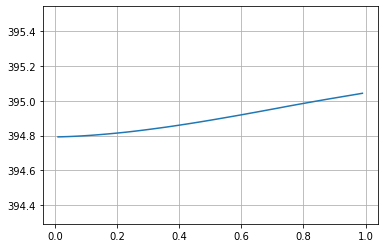

In [58]:
# Cross validation on the value of "alpha" with a given max_iter
RMSE = []
ALPHA = []
for alp in np.arange(0.01,1,.01):
    model = Lasso(alpha = alp, max_iter= 500,random_state=835)
    model.fit(X_tr,y_tr)
    RMSE.append(np.sqrt(mean_squared_error(y_val,model.predict(X_val))))
    ALPHA.append(alp)
Best_Alpha_L = ALPHA[np.argmin(RMSE)]
Best_RMSE_L = np.min(RMSE)
print(f"Best Alpha : {Best_Alpha_L}, Best RMSE : {Best_RMSE_L}")
plt.plot(ALPHA,RMSE);
plt.grid(True)
plt.ylim(bottom = np.min(RMSE)-0.5);
plt.ylim(top = np.max(RMSE)+0.5);


##### Saving the LASSO model with the best parameters

In [59]:
lasso_reg_best = Lasso(alpha = Best_Alpha_L,max_iter= 500,random_state=835)
lasso_reg_best.fit(X_tr,y_tr)

joblib.dump(lasso_reg_best,"lasso_reg_best.pkl")

## joblib.load("lasso_reg_best.pkl") will load the model

['lasso_reg_best.pkl']

### Now let's have a look at the feature weights

In [60]:
feat_weights(lasso_reg_best,strat_train_set_xform_df.columns[:6],strat_train_set_xform_df.columns[6:])

[['PM2.5', 'wd10', 20.954542906036288],
 ['PM2.5', 'wd8', 17.403353545599675],
 ['PM2.5', 'wd9', 15.881714153253485],
 ['PM2.5', 'wd11', 15.028225737902144],
 ['PM2.5', 'wd2', 14.752167245891762],
 ['PM2.5', 'wd0', 8.842763380048778],
 ['PM2.5', 'wd12', 8.126794021364223],
 ['PM2.5', 'station3', 6.073072947825261],
 ['PM2.5', 'station7', 4.786534066620417],
 ['PM2.5', 'station11', 3.648737099368733],
 ['PM2.5', 'DEWP', 3.308669819788327],
 ['PM2.5', 'station9', 2.2173222518083],
 ['PM2.5', 'wd1', 1.966421985767468],
 ['PM2.5', 'station5', 0.47526522172772867],
 ['PM2.5', 'station8', 0.007942962354153751],
 ['PM2.5', 'wd15', -0.0],
 ['PM2.5', 'station4', -0.010539637491573047],
 ['PM2.5', 'station10', -0.3571477563347388],
 ['PM2.5', 'station0', -0.423574580809962],
 ['PM2.5', 'PRES', -1.3887350269078986],
 ['PM2.5', 'WSPM', -2.5938317401234143],
 ['PM2.5', 'RAIN', -4.277152094004893],
 ['PM2.5', 'TEMP', -5.504708878441189],
 ['PM2.5', 'station1', -7.152455382895035],
 ['PM2.5', 'wd4', 

The above coefficients show that regularization penalizes the big weights and limits them compare to the regular linear regression. Unlike the Ridge Regression, LASSO force the coefficient of some of unimportant features to zero. Regularization for this data set might not improve the RMSE but by forcing the algorithm to assign small or zero coefficients, makes the calculation easier and less memory and CPU intensive 

In [61]:
## Calculating the RMSE of the test set
y_te_pred_lasso = lasso_reg_best.predict(X_te)
RMSE_te_lasso = np.sqrt(mean_squared_error(y_te,y_te_pred_lasso))
RMSE_te_lasso

396.7524310914446

#### ElasticNet Regression
Now we implement ElasticNet Regression.    
**Side note:**   
l1_ratio is the ElasticNet mixing parameter, with 0 <= l1_ratio <= 1. For l1_ratio = 0 the penalty is an L2 penalty which makes it the Ridge Regression. For l1_ratio = 1 it is an L1 penalty which makes it the LASSO Regression. For 0 < l1_ratio < 1, the penalty is a combination of L1 and L2.

In [62]:
elastic_reg = ElasticNet(alpha = 1.0, l1_ratio=0.5, max_iter= 500,random_state=835)
elastic_reg.fit(X_tr,y_tr)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=500, normalize=False, positive=False, precompute=False,
           random_state=835, selection='cyclic', tol=0.0001, warm_start=False)

In [63]:
y_val_pred_elastic = elastic_reg.predict(X_val)
RMSE_val_elastic = np.sqrt(mean_squared_error(y_val,y_val_pred_elastic))
RMSE_val_elastic

403.4592649260153

Seems that alpha = 1 added too much regularization which increased the RMSE

#### ElasticNet Regression Hyperparameter Tuning


In [64]:
param_grid = {'alpha': [0.05,0.1,0.2, 0.4, 0.6,1.2], 'max_iter': [500,1000, 5000, 10000], 'l1_ratio': list(np.arange(0.1,1,0.1))}
grid_search = GridSearchCV(elastic_reg, param_grid, cv=5,scoring='neg_mean_squared_error')
grid_search.fit(X_val, y_val)

GridSearchCV(cv=5, error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=500, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=835, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.05, 0.1, 0.2, 0.4, 0.6, 1.2],
                         'l1_ratio': [0.1, 0.2, 0.30000000000000004, 0.4, 0.5,
                                      0.6, 0.7000000000000001, 0.8, 0.9],
                         'max_iter': [500, 1000, 5000, 10000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [65]:
# check the best parameters
grid_search.best_params_

{'alpha': 0.05, 'l1_ratio': 0.9, 'max_iter': 500}

In [66]:
# only print the average RMSE and the associated parameters
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

396.53648875471134 {'alpha': 0.05, 'l1_ratio': 0.1, 'max_iter': 500}
396.53648875471134 {'alpha': 0.05, 'l1_ratio': 0.1, 'max_iter': 1000}
396.53648875471134 {'alpha': 0.05, 'l1_ratio': 0.1, 'max_iter': 5000}
396.53648875471134 {'alpha': 0.05, 'l1_ratio': 0.1, 'max_iter': 10000}
396.3137173176878 {'alpha': 0.05, 'l1_ratio': 0.2, 'max_iter': 500}
396.3137173176878 {'alpha': 0.05, 'l1_ratio': 0.2, 'max_iter': 1000}
396.3137173176878 {'alpha': 0.05, 'l1_ratio': 0.2, 'max_iter': 5000}
396.3137173176878 {'alpha': 0.05, 'l1_ratio': 0.2, 'max_iter': 10000}
396.0871744994635 {'alpha': 0.05, 'l1_ratio': 0.30000000000000004, 'max_iter': 500}
396.0871744994635 {'alpha': 0.05, 'l1_ratio': 0.30000000000000004, 'max_iter': 1000}
396.0871744994635 {'alpha': 0.05, 'l1_ratio': 0.30000000000000004, 'max_iter': 5000}
396.0871744994635 {'alpha': 0.05, 'l1_ratio': 0.30000000000000004, 'max_iter': 10000}
395.85913339491 {'alpha': 0.05, 'l1_ratio': 0.4, 'max_iter': 500}
395.85913339491 {'alpha': 0.05, 'l1_ra

**Conclusion:**  Using GridSearch improved the RMSE to almost the same as the Ridge & LASSO Regression RMSE. The best l1_ration = 0.9 shows that it uses L1 norm more than L2. So, it is more inclined toward LASSO regression.

Best Alpha : 0.01, Best l1_ratio : 0.9, Best RMSE : 394.8021964589822


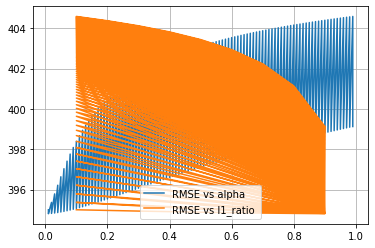

In [67]:
#Cross validation on the value of "alpha" and "l1_ratio" with a given max_iter
RMSE = []
ALPHA = []
l1_ratio =[]
for alp in np.arange(0.01,1,.01):
    for l1 in np.arange(0.1,1,.1):
        model = ElasticNet(alpha = alp, l1_ratio = l1, max_iter= 500,random_state=835)
        model.fit(X_tr,y_tr)
        RMSE.append(np.sqrt(mean_squared_error(y_val,model.predict(X_val))))
        ALPHA.append(alp)
        l1_ratio.append(l1)
Best_Alpha_E = ALPHA[np.argmin(RMSE)]
Best_l1ratio = l1_ratio[np.argmin(RMSE)]
Best_RMSE_E = np.min(RMSE)
print(f"Best Alpha : {Best_Alpha_E}, Best l1_ratio : {Best_l1ratio}, Best RMSE : {Best_RMSE_E}")
plt.plot(ALPHA,RMSE ,label = "RMSE vs alpha ");
plt.plot(l1_ratio,RMSE,label = "RMSE vs l1_ratio ");
plt.legend()
plt.grid(True)
plt.ylim(bottom = np.min(RMSE)-0.5);
plt.ylim(top = np.max(RMSE)+0.5);


##### Saving the ElasticNet model with the best parameters

In [68]:
Elastic_reg_best = ElasticNet(alpha = Best_Alpha_E, l1_ratio=Best_l1ratio , max_iter= 500,random_state=835)
Elastic_reg_best.fit(X_tr,y_tr)

joblib.dump(Elastic_reg_best,"Elastic_reg_best.pkl")

## joblib.load("Elastic_reg_best.pkl") will load the model

['Elastic_reg_best.pkl']

Now let's have a look at the feature weights

In [69]:
feat_weights(Elastic_reg_best,strat_train_set_xform_df.columns[:6],strat_train_set_xform_df.columns[6:])

[['PM2.5', 'wd10', 20.527919770039396],
 ['PM2.5', 'wd8', 17.106291595989294],
 ['PM2.5', 'wd9', 15.627528105917703],
 ['PM2.5', 'wd11', 14.841659981714528],
 ['PM2.5', 'wd2', 14.579889106278847],
 ['PM2.5', 'wd0', 8.813436599383477],
 ['PM2.5', 'wd12', 8.117432362975231],
 ['PM2.5', 'station3', 6.406112252599869],
 ['PM2.5', 'station7', 5.135227928905633],
 ['PM2.5', 'station11', 3.998304598505098],
 ['PM2.5', 'DEWP', 3.3099257114330993],
 ['PM2.5', 'station9', 2.594955399537095],
 ['PM2.5', 'wd1', 2.0629380498790684],
 ['PM2.5', 'station5', 0.8556966614268091],
 ['PM2.5', 'station8', 0.38876894231619596],
 ['PM2.5', 'station4', 0.13861360244107016],
 ['PM2.5', 'wd15', -0.0],
 ['PM2.5', 'station10', -0.021191303836009447],
 ['PM2.5', 'station0', -0.05831564416076457],
 ['PM2.5', 'PRES', -1.3794273298667106],
 ['PM2.5', 'WSPM', -2.618800327800626],
 ['PM2.5', 'RAIN', -4.273399224180546],
 ['PM2.5', 'TEMP', -5.4937185947993],
 ['PM2.5', 'station1', -6.709871230359432],
 ['PM2.5', 'wd4',

The above coefficients show that regularization penalizes the big weights and limits them compare to the regular linear regression. Unlike the Ridge Regression, ElasticNet force the coefficient of some of unimportant features to zero. Regularization for this data set might not improve the RMSE but by forcing the algorithm to assign small or zero coefficients, makes the calculation easier and less memory and CPU intensive 

In [70]:
## Calculating the RMSE of the test set
y_te_pred_ENET = Elastic_reg_best.predict(X_te)
RMSE_te_ENET = np.sqrt(mean_squared_error(y_te,y_te_pred_ENET))
RMSE_te_ENET

396.7577565289881

## Random Forest Regressor model

In [71]:
%%time
from sklearn.ensemble import RandomForestRegressor
RF_reg = RandomForestRegressor(n_estimators=50,max_depth=None,random_state=835).fit(X_tr,y_tr)
RF_reg

Wall time: 2min 17s


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=835, verbose=0, warm_start=False)

In [72]:
from sklearn.metrics import mean_squared_error
RMSE_RFR = np.sqrt(mean_squared_error(y_val,RF_reg.predict(X_val)))
RMSE_RFR

275.2563694200251

From the RMSE given by Random Forest Regressor, we can see that it is significantly improved compare to RMSE = 394 for the Linear Regression.

In [73]:
# Lets look at the feature importances 
sorted(list(zip(strat_train_set_xform_df.columns[6:],RF_reg.feature_importances_))\
       ,key=lambda x: x[1], reverse=True)


[('DEWP', 0.27804053313964305),
 ('TEMP', 0.25290835163639647),
 ('PRES', 0.14093585377801413),
 ('WSPM', 0.1117831355648921),
 ('RAIN', 0.014071443762838035),
 ('station6', 0.011821426293625452),
 ('wd0', 0.009488329177885219),
 ('wd1', 0.009427490149802558),
 ('wd4', 0.009392267606584815),
 ('station10', 0.008991311507045931),
 ('station5', 0.008799890941042596),
 ('station0', 0.008520390496815229),
 ('station8', 0.008392706533696202),
 ('station2', 0.008297787273091226),
 ('station11', 0.008104799498699477),
 ('wd2', 0.00750162099729991),
 ('station1', 0.007376622820371791),
 ('station3', 0.007288519613458183),
 ('station7', 0.00699242336583799),
 ('wd5', 0.006869980994392293),
 ('wd3', 0.006698722479432592),
 ('wd9', 0.006566256394495156),
 ('station9', 0.006365427646432443),
 ('wd12', 0.0060414478576353275),
 ('wd7', 0.006023143121052543),
 ('station4', 0.005956589465068232),
 ('wd10', 0.005638205429324631),
 ('wd15', 0.0055282554859227805),
 ('wd8', 0.005346119298336138),
 ('wd14

Based on the feature importances given above, we can see that the Dew Point, Temperature, Pressure and Wind Speed are the most determining factors in the amount of air polution which was expected

## Random Forest Hyperparameter tuning

In [74]:
%%time
param_grid = {'n_estimators': [50,60,70,80,90,100], 'max_depth': [30,40,50,80,100]}
grid_search = GridSearchCV(RF_reg, param_grid, cv=5,scoring='neg_mean_squared_error',n_jobs=-1)
grid_search.fit(X_val, y_val)

Wall time: 22min 54s


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=50, n_jobs=None,
                                             oob_score=False, random_state=835,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [75]:
# check the best parameters
grid_search.best_params_

{'max_depth': 40, 'n_estimators': 100}

In [76]:
# only print the average RMSE and the associated parameters
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

324.666552743185 {'max_depth': 30, 'n_estimators': 50}
323.9184671872716 {'max_depth': 30, 'n_estimators': 60}
323.4760246842348 {'max_depth': 30, 'n_estimators': 70}
323.33597910203156 {'max_depth': 30, 'n_estimators': 80}
322.9886903578554 {'max_depth': 30, 'n_estimators': 90}
322.7519435742927 {'max_depth': 30, 'n_estimators': 100}
324.26718784794 {'max_depth': 40, 'n_estimators': 50}
323.5410375962135 {'max_depth': 40, 'n_estimators': 60}
323.2173113304736 {'max_depth': 40, 'n_estimators': 70}
323.1407280719197 {'max_depth': 40, 'n_estimators': 80}
322.79384873894446 {'max_depth': 40, 'n_estimators': 90}
322.6086102687884 {'max_depth': 40, 'n_estimators': 100}
324.3973022588881 {'max_depth': 50, 'n_estimators': 50}
323.7253453873076 {'max_depth': 50, 'n_estimators': 60}
323.39740340875994 {'max_depth': 50, 'n_estimators': 70}
323.2326586755934 {'max_depth': 50, 'n_estimators': 80}
322.92582461919704 {'max_depth': 50, 'n_estimators': 90}
322.71978126361466 {'max_depth': 50, 'n_estim

Now that we know that max_depth = 40 is the best, we keep it as is and perform another GridSearch on the n_estimators and max_features.

In [77]:
%%time
param_grid2 = {'n_estimators': [100,150,200], 'max_depth' : [40],'max_features': [5,10,15,20,25,30,33]}
grid_search2 = GridSearchCV(RF_reg, param_grid2, cv=5,scoring='neg_mean_squared_error',n_jobs=-1)
grid_search2.fit(X_val, y_val)

Wall time: 23min 54s


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=50, n_jobs=None,
                                             oob_score=False, random_state=835,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [78]:
# check the best parameters
grid_search2.best_params_

{'max_depth': 40, 'max_features': 20, 'n_estimators': 200}

Let's create the best model based on the GridSearchCV parameters and then save it

In [79]:
RF_reg_best = RandomForestRegressor(n_estimators=200,max_depth=40,max_features =20, random_state=835).fit(X_tr,y_tr)
RF_reg_best

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=40, max_features=20, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=835, verbose=0, warm_start=False)

In [80]:
RMSE_reg_best = np.sqrt(mean_squared_error(y_val,RF_reg_best.predict(X_val)))
RMSE_reg_best

271.1409097941313

In [81]:
joblib.dump(RMSE_reg_best,"RMSE_reg_best.pkl")

## joblib.load("RMSE_reg_best.pkl") will load the model

['RMSE_reg_best.pkl']

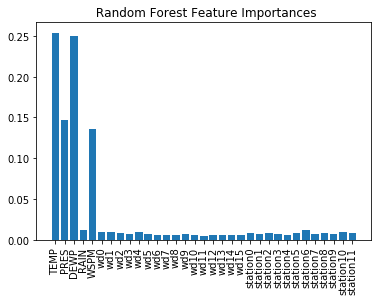

In [82]:
# Let's plot the feature importances for more clarity

plt.bar(x = strat_train_set_xform_df.columns[6:],height = RF_reg_best.feature_importances_)
plt.title(" Random Forest Feature Importances")
plt.tick_params(axis='x', rotation=90)

**Graph Explanation**  
Based on the above plot, it seems that Temprature,Pressure, Dew Point and Wind Speed are the most informative features

**QUESTION**

How Random Forest calculates the overall feature importances for all the target variables?

## Gradient Boosting Regression Trees (GBRT)

Seems that GBRT doesn't support multi-output target variables. So, we need to use Sklearn MultiOutputRegressor 

In [83]:
%%time
from sklearn.ensemble import GradientBoostingRegressor
gbrt_mul_output = MultiOutputRegressor(GradientBoostingRegressor(loss='ls', learning_rate=0.1, \
                                       n_estimators=100,max_depth=3, random_state=835)).fit(X_tr,y_tr)
gbrt_mul_output

Wall time: 5min 51s


MultiOutputRegressor(estimator=GradientBoostingRegressor(alpha=0.9,
                                                         ccp_alpha=0.0,
                                                         criterion='friedman_mse',
                                                         init=None,
                                                         learning_rate=0.1,
                                                         loss='ls', max_depth=3,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_

In [84]:
RMSE_gbrt = np.sqrt(mean_squared_error(y_val,gbrt_mul_output.predict(X_val)))
RMSE_gbrt

352.69286027248756

**conclusion** The above result shows the speed and performance of the GBRT is worse than the Random Forest. slower is expected as GBRT is a sequential algorithm. However, lower error is expected. We can do a gridsearch to find the best hyperparameters

### GBRT Early Stopping implementation
It is also possible to implement early stopping by actually stopping training early
(instead of training a large number of trees first and then looking back to find the
optimal number). You can do so by setting warm_start=True, which makes ScikitLearn keep existing trees when the fit() method is called, allowing incremental
training. The following code stops training when the validation error does not
improve for five iterations in a row:

**Reference:** Hands-On Machine Learning with Scikit-Learn and TensorFlow by Aurélien Géron, 1st edition, page 199

In [85]:
%%time
gbrt_mul_output = MultiOutputRegressor(GradientBoostingRegressor(loss='ls', learning_rate=0.1, \
                                       max_depth=3, random_state=835,warm_start =True))

min_val_error = float("inf")
error_going_up = 0
for n_estim in range(1, 100):
    gbrt_mul_output.n_estimators = n_estim
    gbrt_mul_output.fit(X_tr, y_tr)
    y_pred = gbrt_mul_output.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            n_estimator_bst = n_estim
            break # early stopping
print(f" Best n_estimator = {n_estimator_bst}\nRMSE = {np.sqrt(min_val_error)}")

 Best n_estimator = 6
RMSE = 352.69286027248756
Wall time: 36min 51s


### GBRT Hyperparameter Tuning

In [86]:
%%time
gsc = GridSearchCV(
            estimator=GradientBoostingRegressor(),
            param_grid={"n_estimators": [6],
                        "learning_rate": [0.05, 0.10, 0.3, 0.4,0.5 ,0.6,0.7,0.8,0.9,1],
                        "max_depth": [ 8,10,12,15]                                                
                        },
            cv=3, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)

grid_result = MultiOutputRegressor(gsc).fit(X_val, y_val)

Wall time: 5min 39s


**NOTE** MultiOutputRegressor doesn't have feature_importances_ attribute. So, we first need to use the estimators_ attribute and specify the estimator index (because we have multi target variables and this algorithm creates one model per target variable ) then use feature_importances_ to get the coefficients of that specific estimator

In [87]:
# check the model best parameters and RMSE for each target variable ( we have 6 target variables)
cvres = grid_result.estimators_
for i in range(6):
    best_param = cvres[i].best_params_ # return the best params for each target variable 
    for mean_score, params in zip(cvres[i].cv_results_["mean_test_score"], cvres[i].cv_results_["params"]):
        if params == best_param:
            print(f" y{i} model ({strat_train_set_xform_df.columns[:6][i]}) : RMSE ={np.sqrt(-mean_score)}, Best Params ={params}")

 y0 model (PM2.5) : RMSE =63.61805147000926, Best Params ={'learning_rate': 0.3, 'max_depth': 12, 'n_estimators': 6}
 y1 model (PM10) : RMSE =76.4756070147766, Best Params ={'learning_rate': 0.3, 'max_depth': 12, 'n_estimators': 6}
 y2 model (SO2) : RMSE =18.064539601392017, Best Params ={'learning_rate': 0.3, 'max_depth': 10, 'n_estimators': 6}
 y3 model (NO2) : RMSE =25.610432531543914, Best Params ={'learning_rate': 0.4, 'max_depth': 10, 'n_estimators': 6}
 y4 model (CO) : RMSE =838.7511519167174, Best Params ={'learning_rate': 0.3, 'max_depth': 10, 'n_estimators': 6}
 y5 model (O3) : RMSE =34.02532041795796, Best Params ={'learning_rate': 0.4, 'max_depth': 10, 'n_estimators': 6}


**CAUTION** The above results show that the error for y4 (CO) model is suspeciously high compare to others. we need to investigate why this happens

Now we create the best model for GBRT and save it

In [88]:
gbrt_mul_output_best = MultiOutputRegressor(GradientBoostingRegressor(loss='ls', learning_rate=0.3, \
                                       n_estimators=6,max_depth=12, random_state=835)).fit(X_tr,y_tr)

gbrt_mul_output_best

MultiOutputRegressor(estimator=GradientBoostingRegressor(alpha=0.9,
                                                         ccp_alpha=0.0,
                                                         criterion='friedman_mse',
                                                         init=None,
                                                         learning_rate=0.3,
                                                         loss='ls',
                                                         max_depth=12,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                   

In [89]:
RMSE_gbrt_best = np.sqrt(mean_squared_error(y_val,gbrt_mul_output_best.predict(X_val)))
RMSE_gbrt_best

326.1317942993589

In [90]:
joblib.dump(gbrt_mul_output_best,"gbrt_mul_output_best.pkl")

## joblib.load("gbrt_mul_output_best.pkl") will load the model

['gbrt_mul_output_best.pkl']

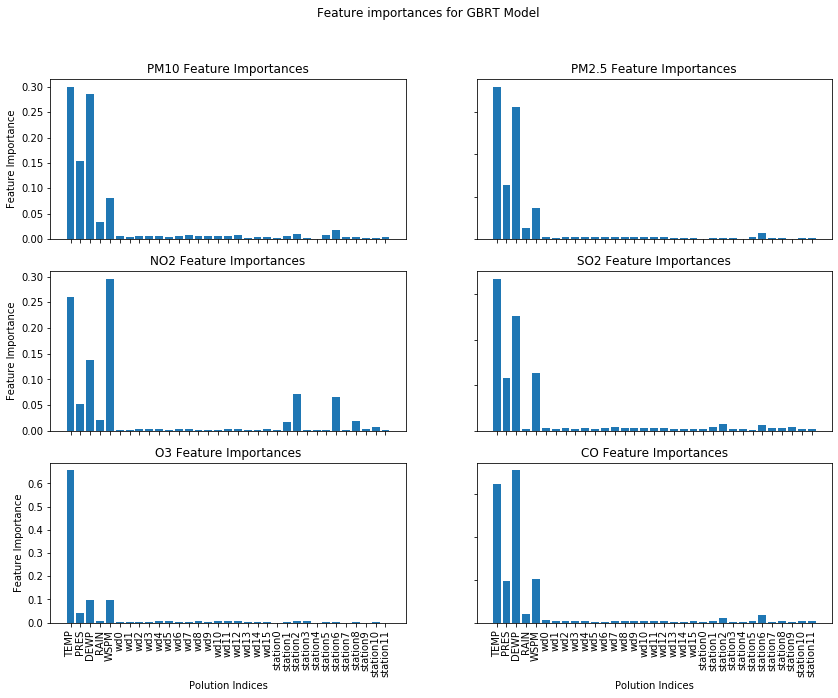

In [91]:
# Let's plot the feature importances for more clarity
fig, axs = plt.subplots(3,2,figsize=(14,10),sharex=True)
fig.suptitle('Feature importances for GBRT Model')
for i in range(3):
    for j in range(2):
        axs[i, j].bar(x = strat_train_set_xform_df.columns[6:],height = gbrt_mul_output_best.estimators_[2*i+1-j].feature_importances_)
        axs[i, j].set_title(strat_train_set_xform_df.columns[:6][2*i+1-j] + " Feature Importances")
        axs[i, j].tick_params(axis='x', rotation=90)
for ax in axs.flat:
    ax.set(xlabel='Polution Indices', ylabel='Feature Importance')

# Hide x labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

## eXtreme Gradient Boosting (XGBoost)
Like GBRT, XGBoost also doesn't support multi-output target variables. So, we need to use Sklearn MultiOutputRegressor 

In [92]:
# XGboost has not been implemented in the sklearn but it is supported. So, first we need to install the package
#!pip install xgboost

In [93]:
import xgboost as xgb

In [94]:
%%time
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", n_estimators = 100, max_depth=8,learning_rate = 0.1,\
                             random_state=835)
xgb_mul_output = MultiOutputRegressor(xgb_model).fit(X_tr,y_tr)


D:\Program Files\Anaconda3\lib\site-packages\xgboost\data.py:106: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


Wall time: 1min 26s


In [95]:
RMSE_xgb = np.sqrt(mean_squared_error(y_val,xgb_mul_output.predict(X_val)))
RMSE_xgb

324.48316442074747

**Conclusion:** The above results proved that XGBoost is indeed super fast compare to RF and GBRT but the error is not necessarily lower. A hyperparameter tuning could improve the error significantly. 

### XGB Hyperparameter Tuning

In [96]:
%%time
gsc = GridSearchCV(
            estimator=xgb.XGBRegressor(),
            param_grid={"learning_rate": (0.05, 0.10, 0.2, 0.5, 1),
                        "max_depth": [ 3, 4, 5, 6, 8],
                        "min_child_weight": [ 1, 3, 5, 7],
                        "gamma":[ 0.0, 0.1, 0.2],
                        "colsample_bytree":[ 0.3, 0.4],},
            cv=3, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)

grid_result_xgb = MultiOutputRegressor(gsc).fit(X_val, y_val)



D:\Program Files\Anaconda3\lib\site-packages\xgboost\data.py:106: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


Wall time: 2h 17min 45s


In [97]:
# check the model best parameters and RMSE for each target variable ( we have 6 target variables)
cvres_xgb = grid_result_xgb.estimators_
for i in range(6):
    best_param_xgb = cvres_xgb[i].best_params_ # return the best params for each target variable 
    for mean_score_xgb, params_xgb in zip(cvres_xgb[i].cv_results_["mean_test_score"], cvres_xgb[i].cv_results_["params"]):
        if params_xgb == best_param_xgb:
            print(f" y{i} model ({strat_train_set_xform_df.columns[:6][i]}) : RMSE ={np.sqrt(-mean_score_xgb)}, Best Params ={params_xgb}")


 y0 model (PM2.5) : RMSE =62.50448772361304, Best Params ={'colsample_bytree': 0.4, 'gamma': 0.0, 'learning_rate': 0.2, 'max_depth': 8, 'min_child_weight': 7}
 y1 model (PM10) : RMSE =74.67607231243854, Best Params ={'colsample_bytree': 0.4, 'gamma': 0.2, 'learning_rate': 0.2, 'max_depth': 8, 'min_child_weight': 7}
 y2 model (SO2) : RMSE =17.596794446504006, Best Params ={'colsample_bytree': 0.4, 'gamma': 0.0, 'learning_rate': 0.2, 'max_depth': 8, 'min_child_weight': 7}
 y3 model (NO2) : RMSE =24.874212691475794, Best Params ={'colsample_bytree': 0.4, 'gamma': 0.0, 'learning_rate': 0.2, 'max_depth': 8, 'min_child_weight': 5}
 y4 model (CO) : RMSE =823.633090708846, Best Params ={'colsample_bytree': 0.4, 'gamma': 0.0, 'learning_rate': 0.2, 'max_depth': 8, 'min_child_weight': 1}
 y5 model (O3) : RMSE =33.127492239369914, Best Params ={'colsample_bytree': 0.4, 'gamma': 0.2, 'learning_rate': 0.2, 'max_depth': 8, 'min_child_weight': 3}


Created the best XGBoost model using the average of the best parameters for all 6 target variables

In [98]:

xgb_mul_output_best = MultiOutputRegressor(xgb.XGBRegressor(learning_rate=0.2, 
                                                        colsample_bytree=0.4,
                                                        max_depth=8, 
                                                        gamma=.07, 
                                                        min_child_weight = 5,
                                                        random_state=835)).fit(X_tr,y_tr)
xgb_mul_output_best

D:\Program Files\Anaconda3\lib\site-packages\xgboost\data.py:106: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


MultiOutputRegressor(estimator=XGBRegressor(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.4, gamma=0.07,
                                            gpu_id=None, importance_type='gain',
                                            interaction_constraints=None,
                                            learning_rate=0.2,
                                            max_delta_step=None, max_depth=8,
                                            min_child_weight=5, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            objective='reg:squarederror',
                                            random_

In [99]:
RMSE_xgb_best = np.sqrt(mean_squared_error(y_val,xgb_mul_output_best.predict(X_val)))
RMSE_xgb_best

325.1364093623586

In [100]:
joblib.dump(xgb_mul_output_best,"xgb_mul_output_best.pkl")

## joblib.load("xgb_mul_output_best.pkl") will load the model

['xgb_mul_output_best.pkl']

#### Let's plot the feature importances for more clarity  
**NOTE:** Like for Multi_output GBRT, we first need to use the estimators_ attribute and specify the estimator index then use feature_importances_ to get the coefficients

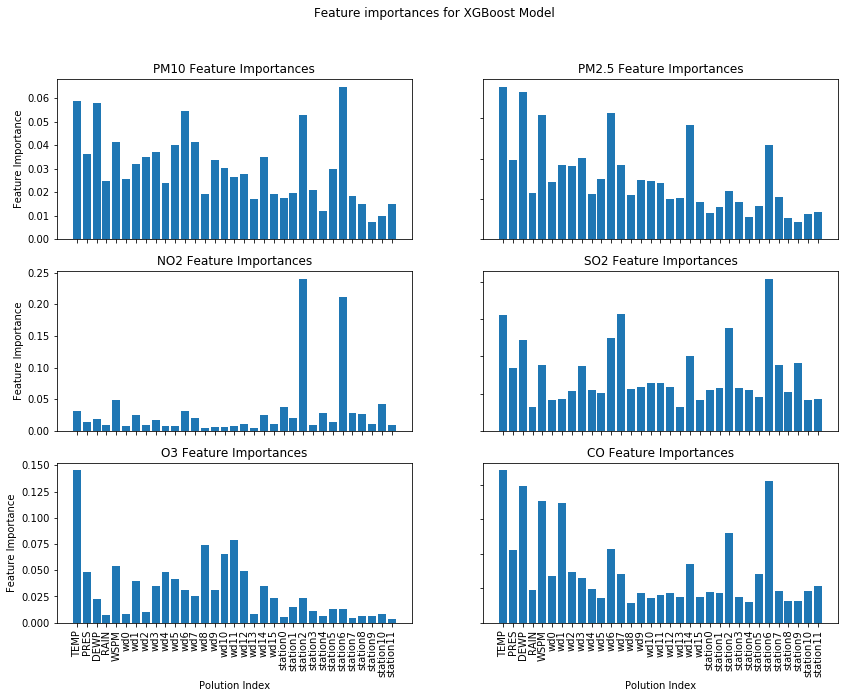

In [101]:
fig, axs = plt.subplots(3,2,figsize=(14,10),sharex=True)
fig.suptitle('Feature importances for XGBoost Model')
for i in range(3):
    for j in range(2):
        axs[i, j].bar(x = strat_train_set_xform_df.columns[6:],height = xgb_mul_output_best.estimators_[2*i+1-j].feature_importances_)
        axs[i, j].set_title(strat_train_set_xform_df.columns[:6][2*i+1-j] + " Feature Importances") # Try to make 0-5 indices with i and j , 2*i+1-j
        axs[i, j].tick_params(axis='x', rotation=90)
for ax in axs.flat:
    ax.set(xlabel='Polution Index', ylabel='Feature Importance')

# Hide x labels labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

## SVM Regression
SVM,Like GBRT and XGBoost, also doesn't support multi-output target variables. So, we need to use Sklearn MultiOutputRegressor 

In [102]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures

In [103]:
linsvm_multiout_reg = Pipeline((
    ("scaler", StandardScaler()), ("linear_svr",MultiOutputRegressor(LinearSVR(random_state=835)),
                  )))

In [104]:
%%time
linsvm_multiout_reg.fit(X_tr,y_tr)

Wall time: 45.5 s


Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svr',
                 MultiOutputRegressor(estimator=LinearSVR(C=1.0, dual=True,
                                                          epsilon=0.0,
                                                          fit_intercept=True,
                                                          intercept_scaling=1.0,
                                                          loss='epsilon_insensitive',
                                                          max_iter=1000,
                                                          random_state=835,
                                                          tol=0.0001,
                                                          verbose=0),
                                      n_jobs=None))],
         verbose=False)

**NOTE:** The value of hyperparameter "epsilon" defines a margin of tolerance where no penalty is given to errors. The larger epsilon is, the larger errors will be admitted in the solution. The value of this parameter depends on the scale of the target variable y. If unsure, set epsilon=0. When epsilon = 0 any error in the  solution will be penalized

In [105]:
RMSE_linSVR = np.sqrt(mean_squared_error(y_val,linsvm_multiout_reg.predict(X_val)))
RMSE_linSVR

423.4285268324621

**Conclusion:** The above results proved that Linear SVM model is indeed super fast compare to RF and GBRT but the error is much higher. A hyperparameter tuning could improve the error significantly. 

Now let's leverage the SVM Regressor with some kernels.    
**CATION** We know that the fit time complexity of Kernel SVM is more than quadratic with the number of samples which makes it hard to scale to datasets with more than a couple of 10000 samples. So, we expect a long training time. In real life cases probably it is not a good idea to use SVC class.

In [106]:
# svm_multiout_reg = Pipeline((
#     ("scaler", StandardScaler()), ("svr",MultiOutputRegressor(SVR(kernel = 'rbf')),
#                   )))

In [107]:
%%time
# Training didn't finish after a few hours, so I canceled it. 
#I will try to make a sample of less than 10K from the training set to train this later
#svm_multiout_reg.fit(X_tr,y_tr)

Wall time: 0 ns


In [108]:
# RMSE_SVR = np.sqrt(mean_squared_error(y_val,svm_multiout_reg.predict(X_val)))
# RMSE_SVR

### Linear SVM Hyperparameter Tuning

When we apply GridSearchCV on a ML Pipeline, we need to know which parameters to pass to the grid. For instance if we simply pass parameter "C", the GridSearch wouldn't know which part of the pipeline this parameter is for. Using estimator.get_params() method would give you the new names for the parameters in the pipeline. In this case, "C" has been renamed 'linear_svr__C'

In [109]:
linsvm_reg = Pipeline((
    ("scaler", StandardScaler()), ("linear_svr",LinearSVR(random_state=835)),
                  ))

linsvm_reg.get_params()

{'memory': None,
 'steps': (('scaler',
   StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('linear_svr',
   LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
             intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
             random_state=835, tol=0.0001, verbose=0))),
 'verbose': False,
 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True),
 'linear_svr': LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
           intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
           random_state=835, tol=0.0001, verbose=0),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'linear_svr__C': 1.0,
 'linear_svr__dual': True,
 'linear_svr__epsilon': 0.0,
 'linear_svr__fit_intercept': True,
 'linear_svr__intercept_scaling': 1.0,
 'linear_svr__loss': 'epsilon_insensitive',
 'linear_svr__max_iter': 1000,
 'linear_svr__random_state': 835,
 'linear_svr__tol': 0.0001,
 'linear_svr__verbo

In [110]:
%%time
gsc_linsvm = GridSearchCV(
            estimator=linsvm_reg,
            param_grid={"linear_svr__C": [0.05, 0.10, 0.2, 0.5, 1,1.2,1.5],
                        "linear_svr__epsilon": [ 0, 0.05, 0.1, 0.2, 0.5],
                        },
            cv=3, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)

grid_result_linsvm = MultiOutputRegressor(gsc_linsvm).fit(X_val, y_val)



D:\Program Files\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Wall time: 2min 6s


In [111]:
# check the model best parameters and RMSE for each target variable ( we have 6 target variables)
cvres_linsvm = grid_result_linsvm.estimators_
for i in range(6):
    best_param_linsvm = cvres_linsvm[i].best_params_ # return the best params for each target variable 
    for mean_score_svm, params_svm in zip(cvres_linsvm[i].cv_results_["mean_test_score"], cvres_linsvm[i].cv_results_["params"]):
        if params_svm == best_param_linsvm:
            print(f" y{i} model ({strat_train_set_xform_df.columns[:6][i]}) : RMSE ={np.sqrt(-mean_score_svm)}, Best Params ={params_svm}")


 y0 model (PM2.5) : RMSE =75.11425933279739, Best Params ={'linear_svr__C': 1.5, 'linear_svr__epsilon': 0.1}
 y1 model (PM10) : RMSE =87.1974781383168, Best Params ={'linear_svr__C': 1.5, 'linear_svr__epsilon': 0.5}
 y2 model (SO2) : RMSE =20.975127444430765, Best Params ={'linear_svr__C': 1.5, 'linear_svr__epsilon': 0.5}
 y3 model (NO2) : RMSE =28.29895082502655, Best Params ={'linear_svr__C': 1, 'linear_svr__epsilon': 0.5}
 y4 model (CO) : RMSE =1039.008442929965, Best Params ={'linear_svr__C': 1.5, 'linear_svr__epsilon': 0.5}
 y5 model (O3) : RMSE =41.60035604585782, Best Params ={'linear_svr__C': 1, 'linear_svr__epsilon': 0}


Created the best Linear SVM model using the average of the best parameters for all 6 target variables

In [112]:

LinSVR_mul_output_best = linsvm_multiout_reg = Pipeline((
    ("scaler", StandardScaler()), ("linear_svr",MultiOutputRegressor(LinearSVR(C = 1.6, epsilon = 0.35,random_state=835)),
                  ))).fit(X_tr,y_tr)
LinSVR_mul_output_best

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svr',
                 MultiOutputRegressor(estimator=LinearSVR(C=1.6, dual=True,
                                                          epsilon=0.35,
                                                          fit_intercept=True,
                                                          intercept_scaling=1.0,
                                                          loss='epsilon_insensitive',
                                                          max_iter=1000,
                                                          random_state=835,
                                                          tol=0.0001,
                                                          verbose=0),
                                      n_jobs=None))],
         verbose=False)

In [113]:
RMSE_linSVM_best = np.sqrt(mean_squared_error(y_val,LinSVR_mul_output_best.predict(X_val)))
RMSE_linSVM_best

423.04066822717294

In [114]:
joblib.dump(LinSVR_mul_output_best,"LinSVR_mul_output_best.pkl")

## joblib.load("LinSVR_mul_output_best.pkl") will load the model

['LinSVR_mul_output_best.pkl']

**NOTE:** In order to access the estimator parameters in a pipeline, we can use pipeline_name.named_steps['step name"] which "step name" is in fact the name of the step in the pipeline. In this case, not only did we use a pipeline but also MultiOutputRegressor wrapper for the LinearSVR. So, after we use that command we have to use ".estimators_" attribute to get our hands on the LinearSVR parameters as shown in the next cell 

In [115]:
est_params = LinSVR_mul_output_best.named_steps['linear_svr'].estimators_
for i, est in enumerate(est_params):
    print(f" y{i} model parameters: {est}")
    print(f" y{i} model coefficients: {est.coef_}")


 y0 model parameters: LinearSVR(C=1.6, dual=True, epsilon=0.35, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=835, tol=0.0001, verbose=0)
 y0 model coefficients: [-39.56072462 -11.34383453  31.68606335  -3.08546633  -2.99950722
   2.39541741   0.46843521   3.7082092   -4.08684827  -2.73906006
  -3.79905781  -4.13543248  -4.60714335   3.80654117   4.06726204
   4.33885343   3.84891521   3.00422021  -1.12893496  -2.84056604
   0.93919348   0.23957757  -0.89646946  -2.36549603   1.29859238
   0.68583075   0.39795231  -3.41017735   1.30695827   0.33154302
   1.0062288    0.47487322   0.93051743]
 y1 model parameters: LinearSVR(C=1.6, dual=True, epsilon=0.35, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=835, tol=0.0001, verbose=0)
 y1 model coefficients: [-46.53711407 -22.4265978   27.49254172  -4.75603677  -2.91126706
   2.54747671   0.25773029 

#### Let's plot the feature importances for more clarity  
**NOTE:** Like for Multi_output GBRT, we first need to use the estimators_ attribute and specify the estimator index then use coef_ attribute to get the coefficients for each target variable

In [ ]:
fig, axs = plt.subplots(3,2,figsize=(14,10),sharex=True)
fig.suptitle('Features Coefficients for LinearSVM Model')
for i in range(3):
    for j in range(2):
        axs[i, j].bar(x = strat_train_set_xform_df.columns[6:],height = est_params[2*i+1-j].coef_)
        axs[i, j].set_title(strat_train_set_xform_df.columns[:6][2*i+1-j] + " Coefficients") # Try to make 0-5 indices with i and j , 2*i+1-j
        axs[i, j].tick_params(axis='x', rotation=90)
for ax in axs.flat:
    ax.set(xlabel='Polution Index', ylabel='Coefficients')

# Hide x labels labels for top plots and y ticks for right plots.
# for ax in axs.flat:
#     ax.label_outer()

We can also see here that the coefficients for "CO" are way larger than the rest of the target variables. This may explain why the RMSE for that target variable was much bigger than the others in other models

## Classification 
Now we are going to perform some multi-class classification task on this data based on the feature " station" 
To do this we will do a stratified train_test_split first to have balanced classes and use accuracy as the metric and for the second experiment we will do a random train_test_split to have imbalanced classes to use precision/recall as the metric

In [117]:
# Convert all 12 stations to numerical classes (0-11)
target_classes = pd.factorize(air_quality.station)[0]
target_classes

# There is another way of doing that by converting the station feature to 'category' data type and then use '.cat.codes'
#    air_quality["station"].astype("category").cat.codes


array([ 0,  0,  0, ..., 11, 11, 11], dtype=int64)

In [118]:
# # Add the numerical labels and drop the categorical column "station"
# air_quality["labels"] = target_classes
# air_quality.drop("station", axis = 1)

In [119]:
# Separate numerical and categorical attributes
cat_feat = ["wd"]  
num_feat = air_quality.columns[5:-2]

In [120]:
num_feat

Index(['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP',
       'RAIN', 'WSPM'],
      dtype='object')

In [121]:
# Create a new pipeline to transform the categorical attributes

cat_pl = Pipeline ([("DF selector",DataFrameSelector(cat_feat)), 
                          ("imputer", SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
                          ("OneHotEncoder", OneHotEncoder()),
                         ])

# Create a pipeline to transform the numerical attributes

num_pl = Pipeline ([("DF selector",DataFrameSelector(num_cols)),  
                          ("imputer", SimpleImputer(missing_values=np.nan, strategy='median')),
                         ])

# Merge two pipelines into a single pipeline

full_pl = FeatureUnion(transformer_list=[("num_pipeline", num_pl),
                                               ("cat_pipeline", cat_pl),
                                              ])


In [122]:
%%time
# Applying the full pipeline to the entire air_quality dataframe
air_quality_xform = full_pl.fit_transform(air_quality).toarray()
print(air_quality_xform.shape)
air_quality_xform

(420768, 27)
Wall time: 8.81 s


array([[ 4.,  4.,  4., ...,  0.,  0.,  0.],
       [ 8.,  8.,  4., ...,  0.,  0.,  0.],
       [ 7.,  7.,  5., ...,  0.,  0.,  0.],
       ...,
       [14., 28.,  4., ...,  0.,  0.,  0.],
       [12., 23.,  4., ...,  0.,  0.,  0.],
       [13., 19.,  4., ...,  0.,  0.,  0.]])

In [123]:
# shuffle the features and target arrays elements
shuffled_idx = np.random.permutation(air_quality.index)
air_quality_xform_shuff = air_quality_xform[shuffled_idx]
target_classes_shuff = target_classes[shuffled_idx]

In [124]:
air_quality_xform_shuff

array([[127., 127.,   4., ...,   0.,   0.,   0.],
       [ 13.,  29.,   7., ...,   0.,   1.,   0.],
       [ 11.,  19.,   2., ...,   0.,   0.,   0.],
       ...,
       [ 44., 287.,   2., ...,   1.,   0.,   0.],
       [ 64.,  64.,  20., ...,   0.,   0.,   0.],
       [239., 315.,  50., ...,   0.,   0.,   0.]])

In [125]:
target_classes_shuff

array([3, 8, 6, ..., 6, 6, 0], dtype=int64)

In [126]:
target_classes_shuff = np.array(target_classes_shuff).T.tolist()

In [127]:
from sklearn.model_selection import train_test_split
X_temp,X_te_clf,y_temp,y_te_clf =train_test_split(air_quality_xform_shuff,target_classes_shuff, test_size = 0.2)
X_tr_clf,X_val_clf,y_tr_clf,y_val_clf =train_test_split(X_temp,y_temp, test_size = 0.2)


In [128]:
print("features" ,X_tr_clf.shape , X_val_clf.shape, X_te_clf.shape)
print("labels", len(y_tr_clf), len(y_val_clf), len(y_te_clf))

features (269291, 27) (67323, 27) (84154, 27)
labels 269291 67323 84154


In [129]:
# Check the balance of the classes in the training set
from collections import Counter
Counter(y_tr_clf), Counter(y_val_clf),Counter(y_te_clf)

(Counter({4: 22390,
          5: 22510,
          7: 22591,
          8: 22437,
          10: 22403,
          1: 22376,
          11: 22449,
          2: 22435,
          3: 22360,
          0: 22354,
          9: 22488,
          6: 22498}),
 Counter({9: 5684,
          6: 5595,
          8: 5605,
          11: 5498,
          5: 5588,
          1: 5642,
          4: 5568,
          0: 5606,
          10: 5633,
          2: 5690,
          3: 5668,
          7: 5546}),
 Counter({7: 6927,
          8: 7022,
          6: 6971,
          0: 7104,
          10: 7028,
          5: 6966,
          9: 6892,
          2: 6939,
          4: 7106,
          11: 7117,
          3: 7036,
          1: 7046}))

The above result shows that all classes have fairly the same number of samples in all sets. So, accuracy could be a good metric

In [130]:
%%time
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter = 2000, random_state=835 ,n_jobs =1,l1_ratio=0.5).fit(X_tr_clf,y_tr_clf)

D:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


Wall time: 7min 39s


D:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [131]:
from sklearn.metrics import accuracy_score
y_pred_clf = log_reg.predict(X_val_clf)
accuracy_score(y_val_clf,y_pred_clf)

0.17882447306269775

In [132]:
y_pred_clf_tr = log_reg.predict(X_tr_clf)
accuracy_score(y_tr_clf,y_pred_clf_tr)

0.1757429695013944

In [133]:
y_pred_clf_te = log_reg.predict(X_te_clf)
accuracy_score(y_te_clf,y_pred_clf_te)

0.17828029564845402

_COLCLUSION_   
we can see that the accuracy on the training set is very low and the same goes with both validation and the test sets.
So, if there is no problem with the underlying data, this can be deemed as a case of underfitting. MAybe adding some crossed features help alleviating the probelm

In [134]:
%%time
from sklearn.ensemble import RandomForestClassifier
RF_reg_clf = RandomForestClassifier(n_estimators=50,max_depth=20,random_state=835,max_features = 15,n_jobs = 1).fit(X_tr_clf,y_tr_clf)
RF_reg_clf

Wall time: 1min 10s


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features=15,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
                       oob_score=False, random_state=835, verbose=0,
                       warm_start=False)

In [135]:
y_pred_clf_rf_tr = RF_reg_clf.predict(X_tr_clf)
accuracy_score(y_tr_clf,y_pred_clf_rf_tr)

0.8627507046280789

In [136]:
y_pred_clf_rf = RF_reg_clf.predict(X_val_clf)
accuracy_score(y_val_clf,y_pred_clf_rf)

0.364437116587199

In [137]:
y_pred_clf_rf_te = RF_reg_clf.predict(X_te_clf)
accuracy_score(y_te_clf,y_pred_clf_rf_te)

0.3654609406564156

_COLCLUSION_   
we can see that the accuracy on the training set is fairly good but the accuracy for both validation and the test sets are way lower. So, if there is no problem with the underlying data, this can be deemed as a case of overfitting. In this case, we need to trade some bias for lower varaince. This can happen using hyperparameters

In [138]:
from sklearn.svm import LinearSVC
Linsvm_clf = Pipeline((
    ("scaler", StandardScaler()), ("Linear svc",LinearSVC()),
                  ))


In [139]:
%%time
Linsvm_clf.fit(X_tr_clf,y_tr_clf)

Wall time: 17min 45s


D:\Program Files\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('Linear svc',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='squared_hinge', max_iter=1000,
                           multi_class='ovr', penalty='l2', random_state=None,
                           tol=0.0001, verbose=0))],
         verbose=False)

In [140]:
y_pred_clf_svm_tr = Linsvm_clf.predict(X_tr_clf)
accuracy_score(y_tr_clf,y_pred_clf_svm_tr)

0.20556572629608863

In [141]:
y_pred_clf_svm = Linsvm_clf.predict(X_val_clf)
accuracy_score(y_val_clf,y_pred_clf_svm)

0.20516019785214562

In [142]:
y_pred_clf_svm_te = Linsvm_clf.predict(X_te_clf)
accuracy_score(y_te_clf,y_pred_clf_svm_te)

0.20668060935903226

_COLCLUSION_   
we can see that the accuracy on the training set is very low and the same goes with both validation and the test sets.
So, if there is no problem with the underlying data, this can be deemed as a case of underfitting. Maybe adding some crossed features help alleviating the probelm

In [143]:
from sklearn.model_selection import cross_val_score

In [144]:
# print(cross_val_score(Linsvm_clf, X_tr_clf, y_tr_clf, cv=3))

D:\Program Files\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[0.20609599 0.20259792 0.20585319]


D:\Program Files\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [146]:
# scaler= StandardScaler()
# X_tr_clf_s = scaler.fit_transform(X_tr_clf)
# X_val_clf_s = scaler.fit_transform(X_val_clf)
# X_te_clf_s = scaler.fit_transform(X_te_clf)

# acc = []
# c = []
# for i in np.arange(0.1,2,0.1):
#     model = LinearSVC(C=i).fit(X_tr_clf_s , y_tr_clf)
#     y_pred = model.predict(X_val_clf_s)
#     acc.append(accuracy_score(y_val_clf,y_pred))
#     c.append(i)
    

## Clustering

A list of 10 of the more popular algorithms is as follows:

1. Affinity Propagation
2. Agglomerative Clustering
3. BIRCH
4. DBSCAN
5. K-Means
6. Mini-Batch K-Means
7. Mean Shift
8. OPTICS
9. Spectral Clustering
10. Mixture of Gaussians

In [ ]:
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import Birch
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import OPTICS
from sklearn.cluster import SpectralClustering
from sklearn.mixture import GaussianMixture
